# 1. Perform histogram matching by taking two images.

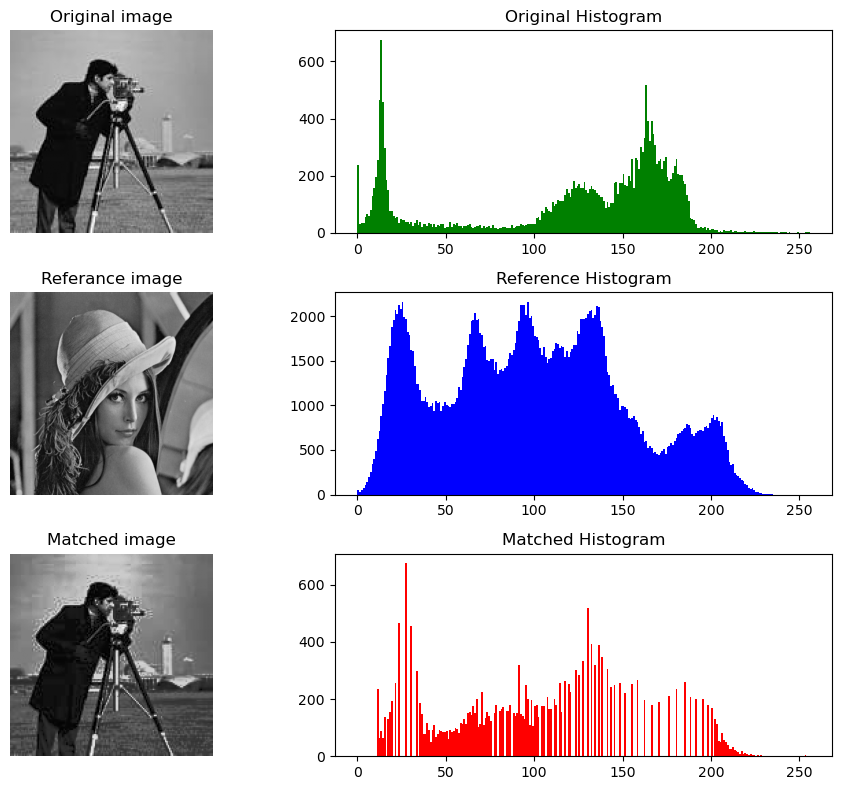

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_matching(image, referance_image):
    src_hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    ref_hist, _ = np.histogram(referance_image.flatten(), bins=256, range=[0, 256])

    src_cdf = np.cumsum(src_hist).astype(np.float64)
    ref_cdf = np.cumsum(ref_hist).astype(np.float64)

    src_cdf /= src_cdf[-1]
    ref_cdf /= ref_cdf[-1]

    lookup_table = np.zeros(256, dtype=np.uint8)
    for src_pixel_val in range(256):
        diff = np.abs(ref_cdf - src_cdf[src_pixel_val])
        closest_val = np.argmin(diff)
        lookup_table[src_pixel_val] = closest_val

    matched_image = cv2.LUT(image, lookup_table)
    return matched_image

def plot_matching_imgs(image, image_title, referance_image, ref_image_title, matched_image, matc_image_title):
    fig, axes = plt.subplots(3, 2, figsize=(10, 8))

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title(image_title)
    axes[0, 0].axis('off')
    axes[0, 1].hist(image.ravel(), bins=256, range=[0, 256], color='green')
    axes[0, 1].set_title("Original Histogram")

    axes[1, 0].imshow(referance_image, cmap='gray')
    axes[1, 0].set_title(ref_image_title)
    axes[1, 0].axis('off')
    axes[1, 1].hist(referance_image.ravel(), bins=256, range=[0, 256], color='blue')
    axes[1, 1].set_title("Reference Histogram")

    axes[2, 0].imshow(matched_image, cmap='gray')
    axes[2, 0].set_title(matc_image_title)
    axes[2, 0].axis('off')
    axes[2, 1].hist(matched_image.ravel(), bins=256, range=[0, 256], color='red')
    axes[2, 1].set_title("Matched Histogram")

    plt.tight_layout()
    plt.savefig("outimg_problem1.png")
    plt.show()


def read_imgs(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  if img is None:
    raise ValueError(f"Error: Unable to read image at {image_path}")
  return img

def main():
  img_path = f"../test_imgs/cameraman.jpg"
  ref_img_path = f"../test_imgs/lena.jpg"

  img = read_imgs(img_path)
  ref_img = read_imgs(ref_img_path)

  hist_matched = histogram_matching(img, ref_img)
  plot_matching_imgs(img, "Original image", ref_img, "Referance image", hist_matched, "Matched image")


if __name__ == "__main__":
  main()